Machine Learning Project
Covid-19
Name[Nora Hamdan Alshehri]
ID[202104690]
Name[Arwa Alghamdi]
ID[202104750]

In [118]:
# data processing library
# data visualization library 

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.metrics
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from collections import Counter

# read data set

In [119]:

# read data set
covid_dataset = pd.read_csv('./Covid_Dataset.csv')
covid_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


Dataset Analysis Section

Pre-processing the data 



In [120]:
# map discrete value by converting string labels into numbers No=0 and Yes=1.
covid_dataset =  covid_dataset.apply(LabelEncoder().fit_transform)
covid_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
# whitespace: remove this by calling map on the columns list and stripping the whitespace with strip.
covid_dataset.columns = covid_dataset.columns.map(str.strip)

In [122]:
# preproessing data 8-drop columns.
# Remove column variables that only have a single value.
covid_dataset = covid_dataset.drop('Wearing Masks', axis=1)
covid_dataset = covid_dataset.drop('Visited Public Exposed Places', axis=1)
covid_dataset = covid_dataset.drop('Family working in Public Exposed Places', axis=1)
covid_dataset = covid_dataset.drop('Sanitization from Market', axis=1)
covid_dataset = covid_dataset.drop('Asthma', axis=1)
covid_dataset = covid_dataset.drop('Hyper Tension', axis=1)
covid_dataset = covid_dataset.drop('Gastrointestinal', axis=1)
covid_dataset = covid_dataset.drop('Fatigue', axis=1)
display(covid_dataset.head())

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Abroad travel,Contact with COVID Patient,Attended Large Gathering,COVID-19
0,1,1,1,1,1,0,0,0,1,0,1,0,1
1,1,1,1,1,0,1,1,0,0,0,0,1,1
2,1,1,1,1,1,1,1,0,1,1,0,0,1
3,1,1,1,0,0,0,0,1,1,1,0,1,1
4,1,1,1,1,1,1,1,1,1,0,1,0,1


Imbalanced Data- Over Sampling

In [123]:
print(sorted(Counter(covid_dataset['COVID-19']).items()))

[(0, 1051), (1, 4383)]


In [124]:
## Get the Fraud and the normal dataset 
covid_yes = covid_dataset[covid_dataset['COVID-19']==1]
covid_No = covid_dataset[covid_dataset['COVID-19']==0]
print(covid_yes.shape  ,covid_No.shape , covid_dataset.shape)

(4383, 13) (1051, 13) (5434, 13)


In [125]:
print(covid_yes.shape  ,covid_No.shape , covid_dataset.shape)

(4383, 13) (1051, 13) (5434, 13)


In [126]:
X_data =  covid_dataset.drop('COVID-19',axis=1)
y_data=  covid_dataset['COVID-19']
# Print the shapes of X & Y
print(X_data.shape)
print(y_data.shape)

(5434, 12)
(5434,)


Text(0.5, 1.0, 'Class Distribution')

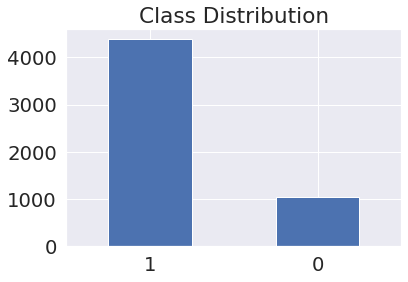

In [127]:
count_classes = pd.value_counts(covid_dataset['COVID-19'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=0)
x_resampled , y_resampled = ROS.fit_resample(X_data,y_data)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

NameError: name 'X_data' is not defined

In [129]:
Counter(y_resampled)# Oure target column after overSampling

Counter({0: 4383, 1: 4383})

Text(0.5, 1.0, 'Class Distribution')

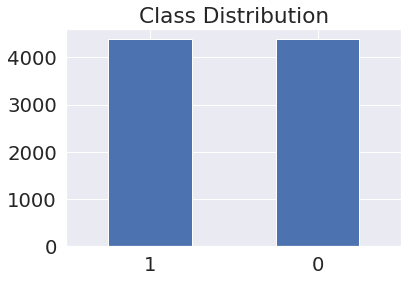

In [130]:
count_classes = pd.value_counts(y_resampled, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")


In [131]:
Correlation = covid_dataset.corr()

Correlation.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Abroad travel,Contact with COVID Patient,Attended Large Gathering,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,-0.098291,-0.062172,-0.073366,0.055427,0.117795,0.214634,0.200304,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,-0.025160,-0.035416,-0.031462,0.050286,0.128726,0.164704,0.070490,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,-0.043664,-0.035912,0.047566,-0.006593,0.331418,0.128330,0.117963,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,-0.050440,-0.015971,0.002177,0.001938,0.205986,0.189251,0.216438,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.014376,0.068479,-0.056750,0.042961,0.034526,0.003776,0.061099,-0.005657
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,1.000000,-0.050480,-0.039860,0.046789,-0.088854,-0.062482,-0.020548,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,-0.050480,1.000000,0.048471,0.032390,0.043589,-0.082101,-0.162992,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,-0.039860,0.048471,1.000000,-0.032956,-0.020761,-0.025593,-0.045437,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,0.046789,0.032390,-0.032956,1.000000,0.039013,-0.085696,-0.061650,0.040627
Abroad travel,0.117795,0.128726,0.331418,0.205986,0.034526,-0.088854,0.043589,-0.020761,0.039013,1.000000,0.080210,0.113399,0.443875


In [132]:
output_df = covid_dataset['COVID-19']
feat_df = covid_dataset[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Chronic Lung Disease', 'Headache', 'Heart Disease',
       'Diabetes', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering']]
covid_dataset = covid_dataset.apply(LabelEncoder().fit_transform)
# X_data, y_data
X_data = feat_df.values
y_data = output_df.values
# STRATIFY split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=20211114, stratify=y_data)

print('X_data={}'.format(X_data.shape))
print('X_train={}, X_test={}'.format(X_train.shape, X_test.shape))
print('y_train={}, y_test={}'.format(y_train.shape, y_test.shape))
print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))


X_data=(5434, 12)
X_train=(4347, 12), X_test=(1087, 12)
y_train=(4347,), y_test=(1087,)

class % in y_train = [0.19 0.81]


Missing Values 

In [133]:
# Create a table with number of missing values of missing data in the dataset
missing_values = covid_dataset.isnull().sum() 

# missing value percent %
percent_missing = missing_values / covid_dataset.shape[0]*100 

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}


In [1]:
#Constructing DataFrame from a dictionary 
frame = pd.DataFrame(value) 
frame

NameError: name 'pd' is not defined

Model Selection Section

In [135]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Neural_Network
def nn_covid(n_features=12):
    tf.random.set_seed(20211114) 
    
    nn_covid = keras.Sequential(
        [
            layers.Dense(1024, activation="relu", name="H-1", input_shape=(12,)),
            layers.Dense(512, activation="relu", name="H-2"),
            layers.Dense(1024, activation="relu", name="H-3"),
            layers.Dense(1, activation="sigmoid", name="output"),
        ]
)
    opt = keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
    nn_covid.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return nn_covid

Model Selection Pool 

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

random_seed=20211114
# The pool of models 
ml_pool = {
    'Dt1' : DecisionTreeClassifier(max_depth=3, max_features='log2'),
    'Dt2' : DecisionTreeClassifier(max_depth=4, max_features='log2'),
    'Dt3' : DecisionTreeClassifier(max_depth=5, max_features='log2'),
    'Dt4' : DecisionTreeClassifier(max_depth=7, max_features='sqrt'),
    'Dt5' : DecisionTreeClassifier(max_depth=8, max_features='sqrt'),

    'lr1': LogisticRegression(random_state=random_seed),

    'rf1': RandomForestClassifier(n_estimators=200, max_features='log2'),

    'rf1': RandomForestClassifier(n_estimators=500, max_features='sqrt'),
    'rf2': RandomForestClassifier(n_estimators=400, max_features='sqrt'),
    'rf3': RandomForestClassifier(n_estimators=300, max_features='sqrt'),
    'rf4': RandomForestClassifier(n_estimators=200, max_features='sqrt'),
    'rf5': RandomForestClassifier(n_estimators=100, max_features='sqrt'),
    
    
    '3nn': KNeighborsClassifier(n_neighbors=3),
    '5nn': KNeighborsClassifier(n_neighbors=5),
    '7nn': KNeighborsClassifier(n_neighbors=7),
    '10nn': KNeighborsClassifier(n_neighbors=10),
    '12nn': KNeighborsClassifier(n_neighbors=12),

    'adaboost1': AdaBoostClassifier(n_estimators=500) ,
    'adaboost2': AdaBoostClassifier(n_estimators=400) ,
    'adaboost3': AdaBoostClassifier(n_estimators=300) ,
    'adaboost4': AdaBoostClassifier(n_estimators=200) ,
    'adaboost5': AdaBoostClassifier(n_estimators=100) ,
    
    'nn_covid': nn_covid,
}

Analyze the results of model selection by K-fold CV performance

In [137]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

random_seed=20211114

scoring_funcs = [metrics.roc_auc_score, metrics.average_precision_score]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',min_delta=0.001, patience=100, restore_best_weights=True)

eval_results = []
fold_num = 0
for train_folds, test_folds in skf.split(X_train, y_train):
    X_train_fold ,X_test_fold=X_train[train_folds],X_train[test_folds]
    y_train_fold ,y_test_fold=y_train[train_folds],y_train[test_folds]
    # train and evaluate models in pool
    for model in ml_pool:
        if model in ['nn_covid']:
            nn_covid = ml_pool[model]()
            nn_covid.fit(X_train_fold, y_train_fold, batch_size=1024, verbose=0, epochs=100,validation_split=0.2, callbacks=[es])
            y_pred_on_test_fold = nn_covid.predict(X_test_fold)[:,0]
        else:
            ml_pool[model].fit(X_train_fold,y_train_fold)
            y_pred_on_test_fold = ml_pool[model].predict_proba(X_test_fold)[:,1]
            
        model_eval_results = []
        for scoring_metric in scoring_funcs:
            model_eval_results.append(scoring_metric(y_test_fold, y_pred_on_test_fold))

        eval_results.append([model, fold_num] + model_eval_results) # name of model and its fold evaluation results
        print('Fold {} model {} done'.format(fold_num, model))

    print('Iteration fold {} done'.format(fold_num))
    print('----------------------------------------------------------------------------')
    fold_num += 1

Fold 0 model Dt1 done
Fold 0 model Dt2 done
Fold 0 model Dt3 done
Fold 0 model Dt4 done
Fold 0 model Dt5 done
Fold 0 model lr1 done
Fold 0 model rf1 done
Fold 0 model rf2 done
Fold 0 model rf3 done
Fold 0 model rf4 done
Fold 0 model rf5 done
Fold 0 model 3nn done
Fold 0 model 5nn done
Fold 0 model 7nn done
Fold 0 model 10nn done
Fold 0 model 12nn done
Fold 0 model adaboost1 done
Fold 0 model adaboost2 done
Fold 0 model adaboost3 done
Fold 0 model adaboost4 done
Fold 0 model adaboost5 done
Fold 0 model nn_covid done
Iteration fold 0 done
----------------------------------------------------------------------------
Fold 1 model Dt1 done
Fold 1 model Dt2 done
Fold 1 model Dt3 done
Fold 1 model Dt4 done
Fold 1 model Dt5 done
Fold 1 model lr1 done
Fold 1 model rf1 done
Fold 1 model rf2 done
Fold 1 model rf3 done
Fold 1 model rf4 done
Fold 1 model rf5 done
Fold 1 model 3nn done
Fold 1 model 5nn done
Fold 1 model 7nn done
Fold 1 model 10nn done
Fold 1 model 12nn done
Fold 1 model adaboost1 don

#Data vizualisation

In [138]:
# create eval_df from eval_results
eval_df=pd.DataFrame(data=eval_results, columns=['Model', 'Fold Index', 'ROC-AUC', 'PR-AUC'])
eval_df=eval_df.sort_values(['Model', 'Fold Index'])
# print the describe results
eval_df.groupby(['Model']).describe()[['ROC-AUC', 'PR-AUC']].round(2)

ROC-AUC                          ... PR-AUC                        
            count  mean   std   min   25%  ...    min   25%   50%   75%   max
Model                                      ...                               
10nn          5.0  1.00  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
12nn          5.0  1.00  0.00  0.99  1.00  ...   1.00  1.00  1.00  1.00  1.00
3nn           5.0  0.99  0.01  0.97  0.99  ...   0.99  0.99  1.00  1.00  1.00
5nn           5.0  1.00  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
7nn           5.0  1.00  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
Dt1           5.0  0.90  0.05  0.83  0.88  ...   0.93  0.95  0.97  0.98  0.98
Dt2           5.0  0.94  0.01  0.93  0.93  ...   0.97  0.98  0.98  0.98  0.99
Dt3           5.0  0.97  0.02  0.95  0.97  ...   0.99  0.99  0.99  0.99  1.00
Dt4           5.0  0.99  0.00  0.98  0.99  ...   1.00  1.00  1.00  1.00  1.00
Dt5           5.0  0.99  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
adaboost1     5.0  0.99  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
adaboost2     5.0  0.99  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
adaboost3     5.0  0.99  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
adaboost4     5.0  0.99  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
adaboost5     5.0  0.99  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
lr1           5.0  0.99  0.00  0.99  0.99  ...   1.00  1.00  1.00  1.00  1.00
nn_covid      5.0  1.00  0.00  1.00  1.00  ...   1.00  1.00  1.00  1.00  1.00
rf1           5.0  1.00  0.00  0.99  1.00  ...   1.00  1.00  1.00  1.00  1.00
rf2           5.0  1.00  0.00  1.00  1.00  ...   1.00  1.00  1.00  1.00  1.00
rf3           5.0  1.00  0.00  0.99  1.00  ...   1.00  1.00  1.00  1.00  1.00
rf4           5.0  1.00  0.00  1.00  1.00  ...   1.00  1.00  1.00  1.00  1.00
rf5           5.0  1.00  0.00  1.00  1.00  ...   1.00  1.00  1.00  1.00  1.00

[22 rows x 16 columns]

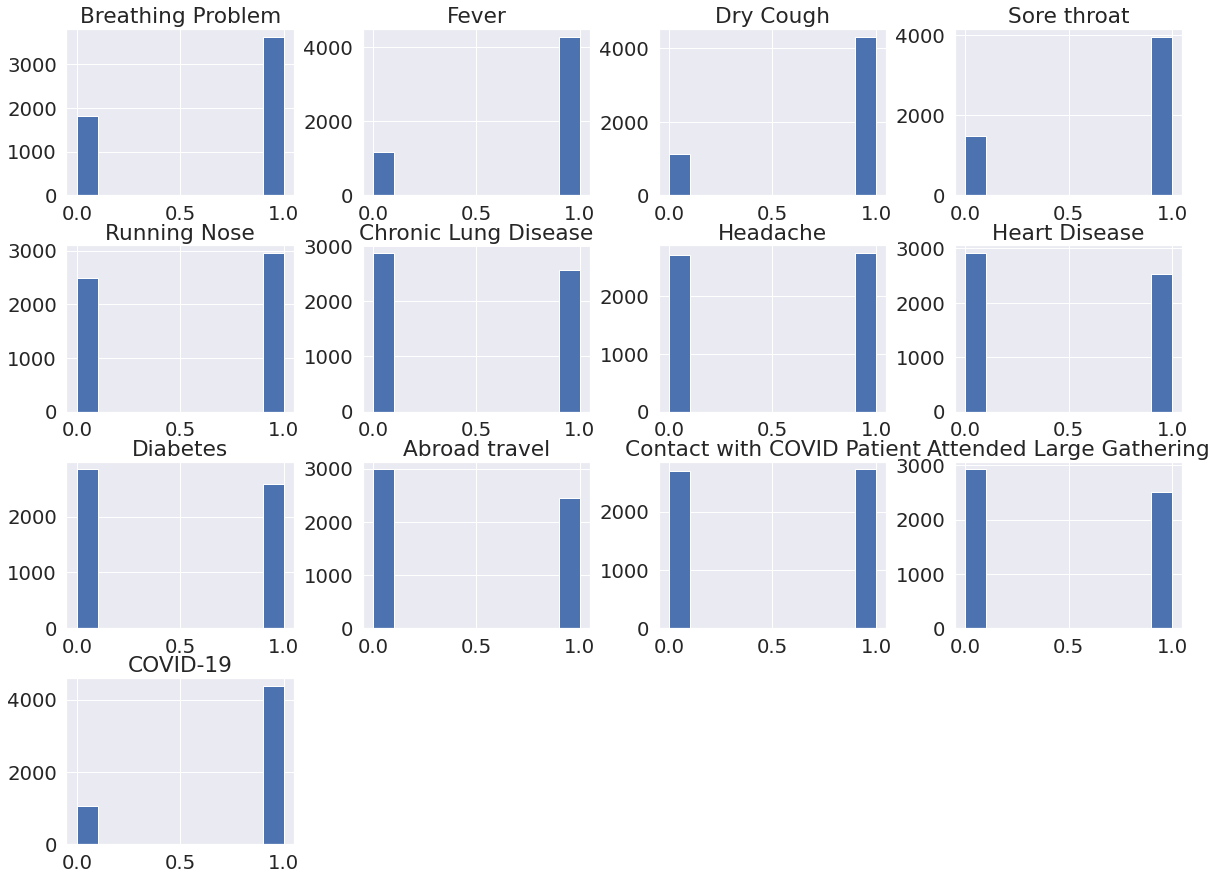

In [139]:
covid_dataset.hist(figsize=(20,15));

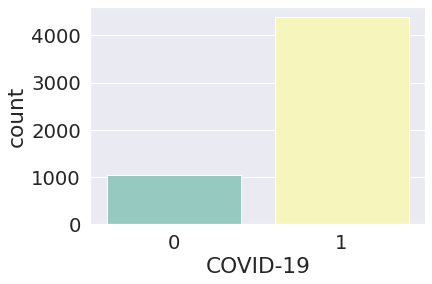

In [140]:
sns.countplot(x = 'COVID-19', data = covid_dataset , palette = "Set3")

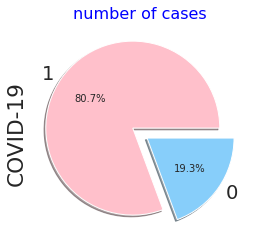

In [141]:
# use autopact to display the percent value using Python string formatting
colors = ['pink' , 'lightskyblue']
p = covid_dataset["COVID-19"].value_counts()
p.plot.pie(explode=[0.1,0.1],colors = colors,autopct='%1.1f%%',shadow=True)
plt.title('number of cases', fontsize=16, color="blue");

Text(0.5, 1.0, '5-fold CV results on ROC-AUC')

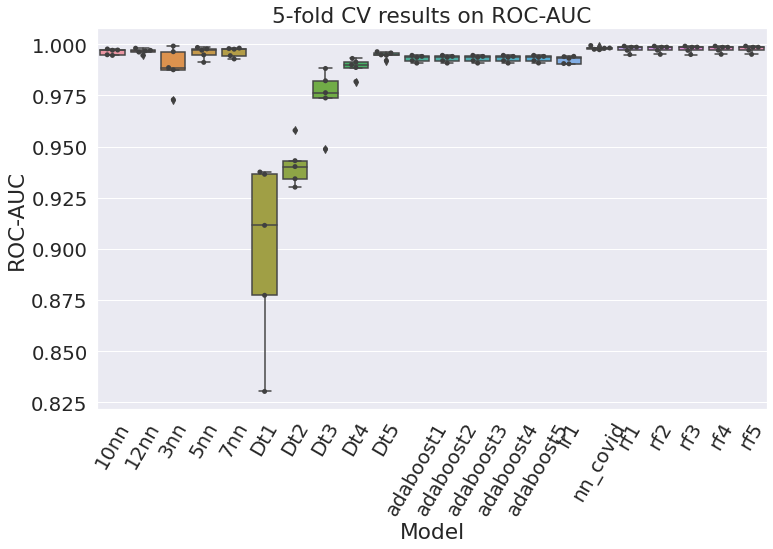

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=1.8)
# plot the roc_auc by model
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x="Model", y="ROC-AUC", data=eval_df)
ax = sns.swarmplot(x="Model", y="ROC-AUC", data=eval_df, color=".25")
plt.xticks(rotation=60)
plt.title('5-fold CV results on ROC-AUC')

Text(0.5, 1.0, '5-fold CV results on PR-AUC')

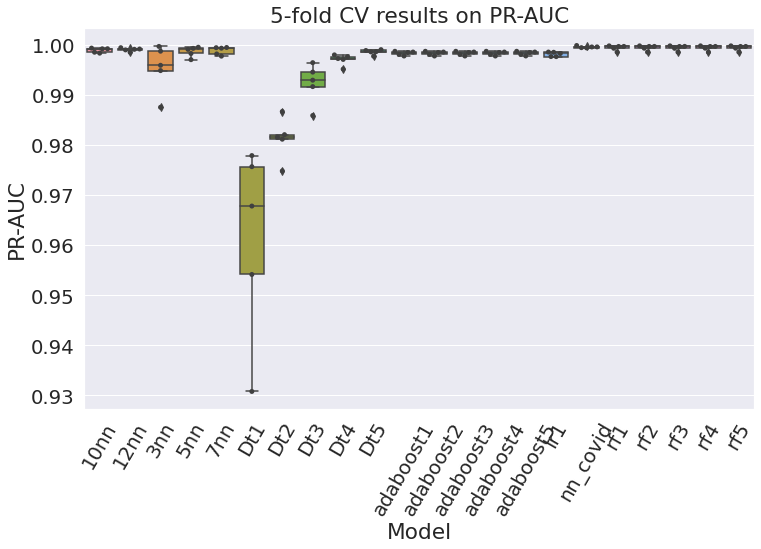

In [143]:
# plot the pr-auc by model
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x="Model", y="PR-AUC", data=eval_df)
ax = sns.swarmplot(x="Model", y="PR-AUC", data=eval_df, color=".25")
plt.xticks(rotation=60)
plt.title('5-fold CV results on PR-AUC')

In [144]:
random_seed=20211114
# set best model
best_model = RandomForestClassifier(random_state=random_seed)

best_model.fit(X_test,y_test)
#evaluate on test set
y_pred_on_test = best_model.predict(X_test)
test_roc = metrics.roc_auc_score(y_test, y_pred_on_test)
test_pr = metrics.average_precision_score(y_test, y_pred_on_test)

print('Test ROC-AUC: {:2f}. Test PR-AUC: {:2f}'.format(test_roc, test_pr))

Test ROC-AUC: 0.979443. Test PR-AUC: 0.990782


In [145]:
# define one new instance
Xnew = [[0,0,0,0,0,0,0,0,0,0,0,0]] 
y_pred = best_model.predict(Xnew)
print(y_pred)

[0]


In [146]:
# define one new instance
Xnew = [[1,0,1,0,1,0,1,0,1,0,1,0]] 
y_pred = best_model.predict(Xnew)
print(y_pred)

[1]
